In [1]:
import warnings
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("C:\\Users\\vishn\\DataScience\\Projects For Ds\\RainFall prediction\\data\\weatherAUS.csv")

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

#  calculates the percentage of missing values in each column of a DataFrame (df). This is a useful check to identify columns with a high percentage of missing data. 

In [6]:
round(df.isna().sum()/df.shape[0]*100 , 4)

Date              0.0000
Location          0.0000
MinTemp           1.0209
MaxTemp           0.8669
Rainfall          2.2419
Evaporation      43.1665
Sunshine         48.0098
WindGustDir       7.0989
WindGustSpeed     7.0555
WindDir9am        7.2639
WindDir3pm        2.9066
WindSpeed9am      1.2148
WindSpeed3pm      2.1050
Humidity9am       1.8246
Humidity3pm       3.0984
Pressure9am      10.3568
Pressure3pm      10.3314
Cloud9am         38.4216
Cloud3pm         40.8071
Temp9am           1.2148
Temp3pm           2.4811
RainToday         2.2419
RainTomorrow      2.2460
dtype: float64

# calculates the total number of duplicated rows in a DataFrame df. It returns the sum of all True values generated by the duplicated() method, indicating the number of rows that are duplicates.

In [7]:
import pandas as pd

# Calculate the number of duplicated rows
duplicates_count = df.duplicated().sum()

# Print the result
print("Number of Duplicates:", duplicates_count)

Number of Duplicates: 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# showing the categorical column that mean it only shows name (char) not numbers

In [10]:
cat_df=df.select_dtypes('object')
cat_df

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


In [11]:
cat_df.nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

# calculates the percentage of missing values in each column of the cat_df DataFrame, which contains only the categorical columns.

In [12]:
cat_df.isna().mean()*100

Date            0.000000
Location        0.000000
WindGustDir     7.098859
WindDir9am      7.263853
WindDir3pm      2.906641
RainToday       2.241853
RainTomorrow    2.245978
dtype: float64

# analysing by visulazation for rain fall YES or NO

In [13]:
df.dropna(subset=['RainTomorrow'],inplace=True )#removed all the null values from data
dfRainTmrw=df['RainTomorrow'].value_counts()

In [14]:
dfRainTmrw

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [15]:
labels = list(dfRainTmrw.index)
labels


['No', 'Yes']

([<matplotlib.patches.Wedge at 0x1ab82ca06a0>,
 [Text(-0.8382813733394672, 0.7122389620851257, 'No'),
  Text(0.8382813399971538, -0.7122390013279086, 'Yes')],
 [Text(-0.45724438545789114, 0.3884939793191594, '77.582%'),
  Text(0.45724436727117473, -0.3884940007243137, '22.418%')])

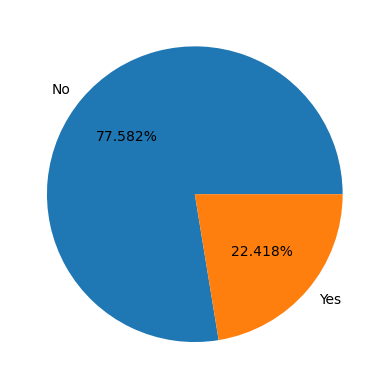

In [16]:
plt.pie(dfRainTmrw,labels=labels,autopct='%1.3f%%')

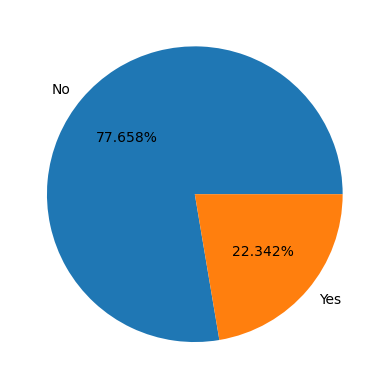

In [17]:
df.dropna(subset=['RainToday'], inplace=True)
dfraintoday=df['RainToday'].value_counts()
labels = list(dfraintoday.index)
plt.pie(dfraintoday, labels=labels, autopct='%1.3f%%')
plt.show()

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df['Date']

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145454   2017-06-20
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
Name: Date, Length: 140787, dtype: datetime64[ns]

In [20]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [21]:
df.drop('Date', axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [22]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

# Numerical Variables
 selects only the columns with numeric data types from the DataFrame df and assigns them to a new DataFrame called num_df. This code excludes the columns with object data types, thus focusing on the numeric columns.

In [23]:
num_df = df.select_dtypes(exclude='object')#exclude shows the numnberical value
num_df.head(200)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1.2,17.7,0.0,NaN,NaN,17.0,0.0,6.0,83.0,49.0,1022.3,1022.2,NaN,NaN,6.6,15.4,2009,6,16
198,0.6,15.9,0.0,NaN,NaN,13.0,0.0,2.0,94.0,52.0,1029.7,1027.7,NaN,NaN,5.6,14.9,2009,6,17
199,0.5,14.7,0.0,NaN,NaN,11.0,6.0,0.0,99.0,63.0,1031.6,1028.6,8.0,NaN,4.7,14.5,2009,6,18
200,0.5,15.3,0.0,NaN,NaN,13.0,6.0,6.0,93.0,56.0,1030.8,1027.1,NaN,NaN,5.4,15.1,2009,6,19


In [24]:
def plotscattered(column_to_category,data,row=3,col=3):
    for i in range(0,len(column_to_category)):
        plt.subplot(row, col, i+1)
        df.boxplot(column_to_category[i])
        plt.title(f"{column_to_category[i]}" ,fontsize=20)
    plt.show()    
    
    

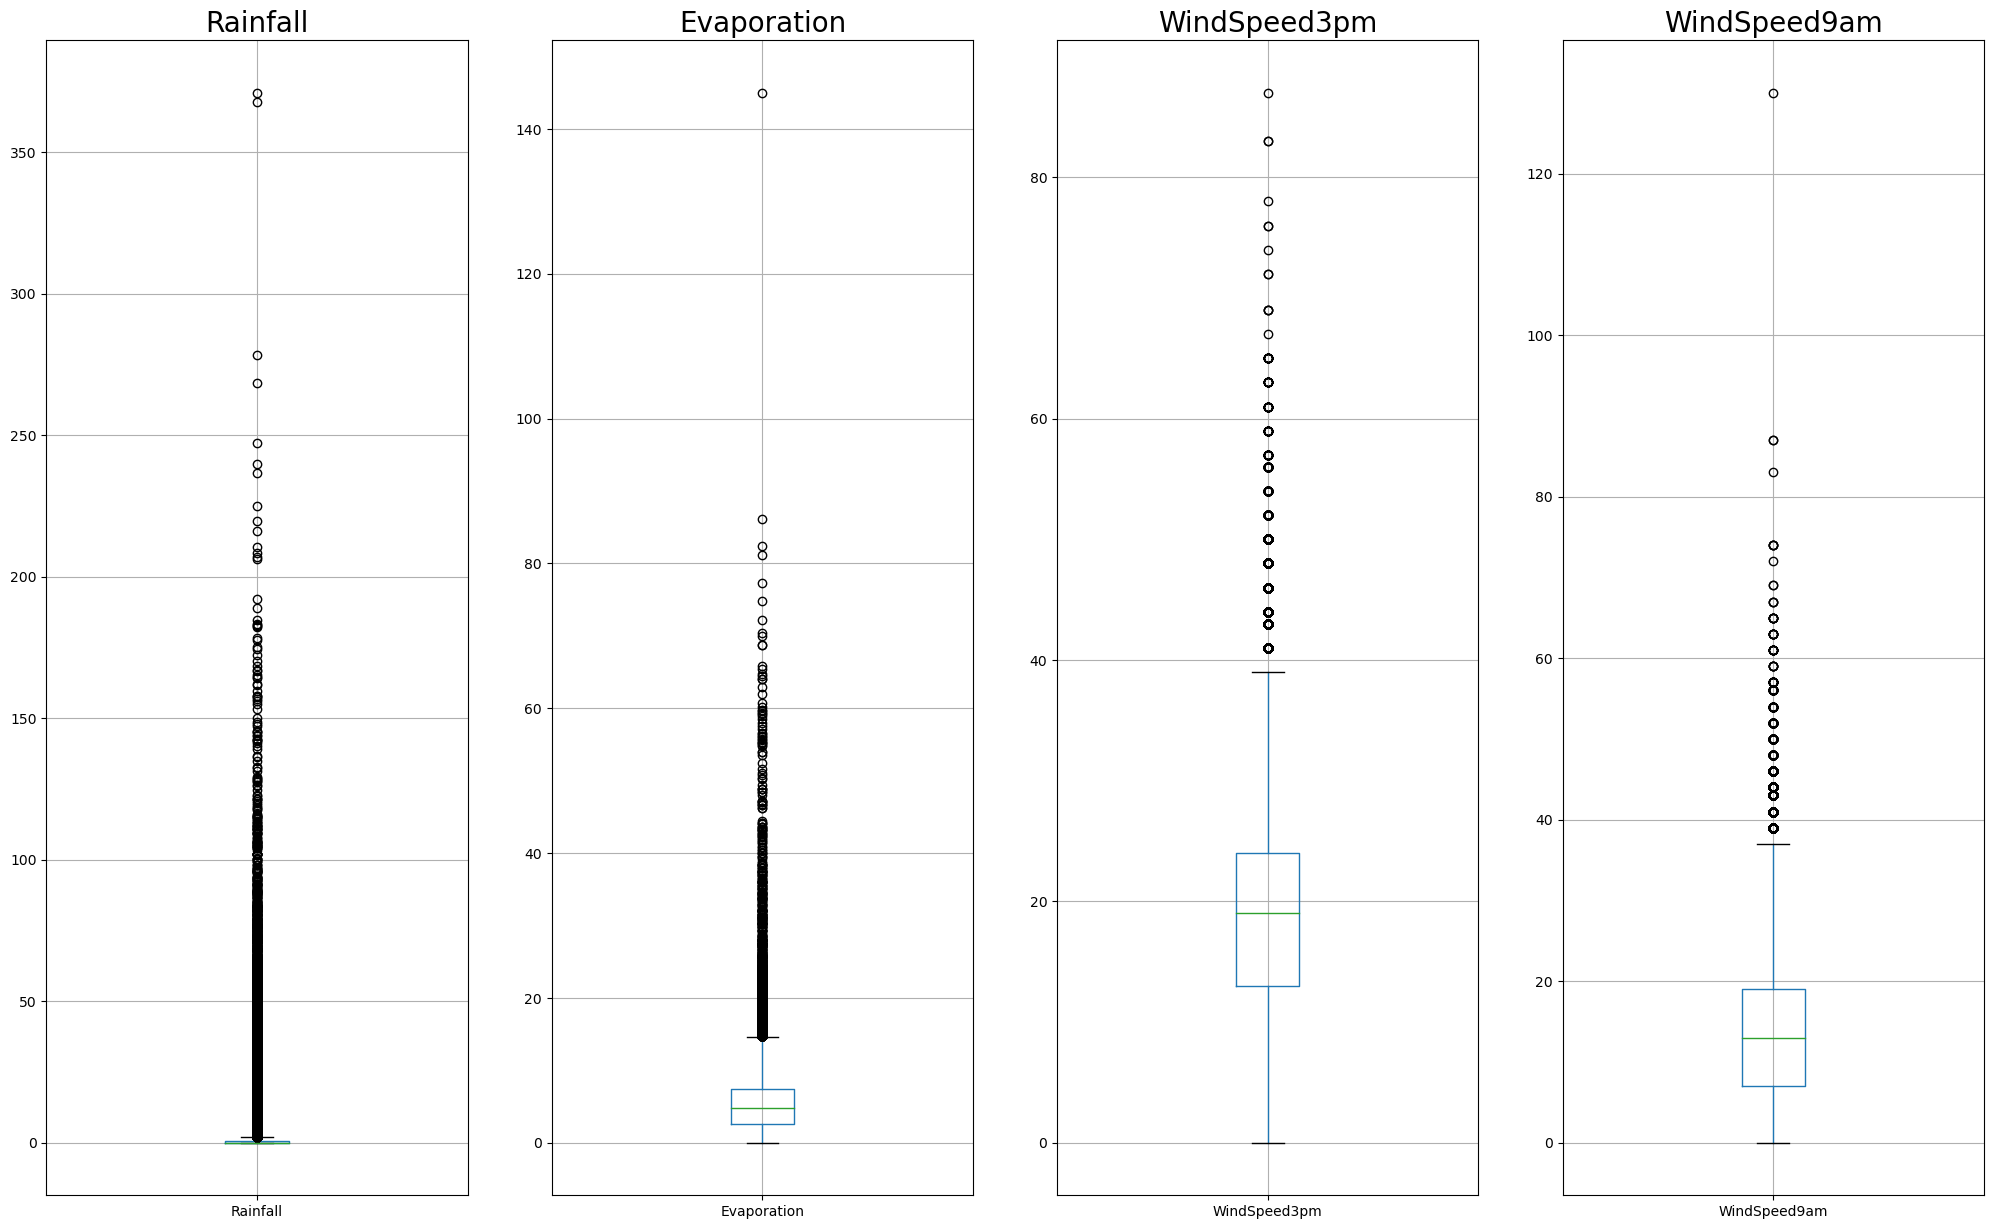

In [25]:
column_to_category = ['Rainfall', 'Evaporation', 'WindSpeed3pm', 'WindSpeed9am']
plt.figure(figsize=(25, 15))
plotscattered(column_to_category, df, row=1, col=4)

# Now is time to data modeling

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Separating the data into categorical and numerical subsets can be beneficial for several  . One of the reasons  ex:Feature engineering: Categorical and numerical features may require different preprocessing steps before modeling. For categorical data, you might need to perform one-hot encoding or label encoding, while numerical data may need scaling or normalization. Separating the data helps streamline the preprocessing steps for each data type.Model compatibility: Certain machine learning algorithms only accept numerical data as inputs. By separating categorical and numerical data, you can ensure that only the numerical subset is used for modeling, or apply appropriate encoding techniques to convert categorical data into a numerical format compatible with the model.

In [27]:
cat_df = df.select_dtypes('object')
num_df = df.select_dtypes(exclude='object')
cat_df.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [28]:
num_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,2017,6,20
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,2017,6,21
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,2017,6,22
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,2017,6,23


# Overall, separating the data into categorical and numerical subsets allows for better understanding, preprocessing, analysis, and modeling of the different types of data present in the dataset, leading to more accurate and meaningful results.

# fixing null values of numerical columns

In [29]:

for i in num_df.columns:
    df[i].fillna(df[i].median(), inplace=True)
    df.isna().sum()

In [30]:
df.isna().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      9163
WindGustSpeed       0
WindDir9am       9660
WindDir3pm       3670
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
Year                0
Month               0
Day                 0
dtype: int64

In [31]:
df['RainToday']

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainToday, Length: 140787, dtype: object

# in here we are going to chnage value of yes to 1 and no to 0

In [32]:
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [33]:
df['RainToday']

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainToday, Length: 140787, dtype: int64

In [34]:
cat_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
dummy_features = pd.get_dummies(df[cat_columns], drop_first=True)
dummy_features

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
# create new dataframe after creating dummy var
df = pd.concat([df, dummy_features], axis=1) #we adding df with dummyvaribles

df = df.drop(cat_columns, axis=1) #we dont need cat_columns any more instead of we using the dummy varibles we creting usinf catclmns

df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0



In machine learning, categorical variables need to be converted into numerical format before they can be used as input for many algorithms. One common approach is to use dummy variables, also known as one-hot encoding.

# Outliers are data points that significantly deviate from the majority of the data in a dataset. They can be observations that are unusually high or low in value compared to the other data points.

# By organizing the columns into different lists, you can group them based on their related characteristics or for specific analysis purposes. This can make it easier to work with and analyze the data in a more organized manner.

In [36]:
a1 = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine','WindGustSpeed',
      'WindSpeed9am', 'WindSpeed3pm']
a2 = ['Pressure9am', 'Pressure3pm', 'Rainfall'] 
a4 = []
a3 = ['Humidity9am','Humidity3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm']

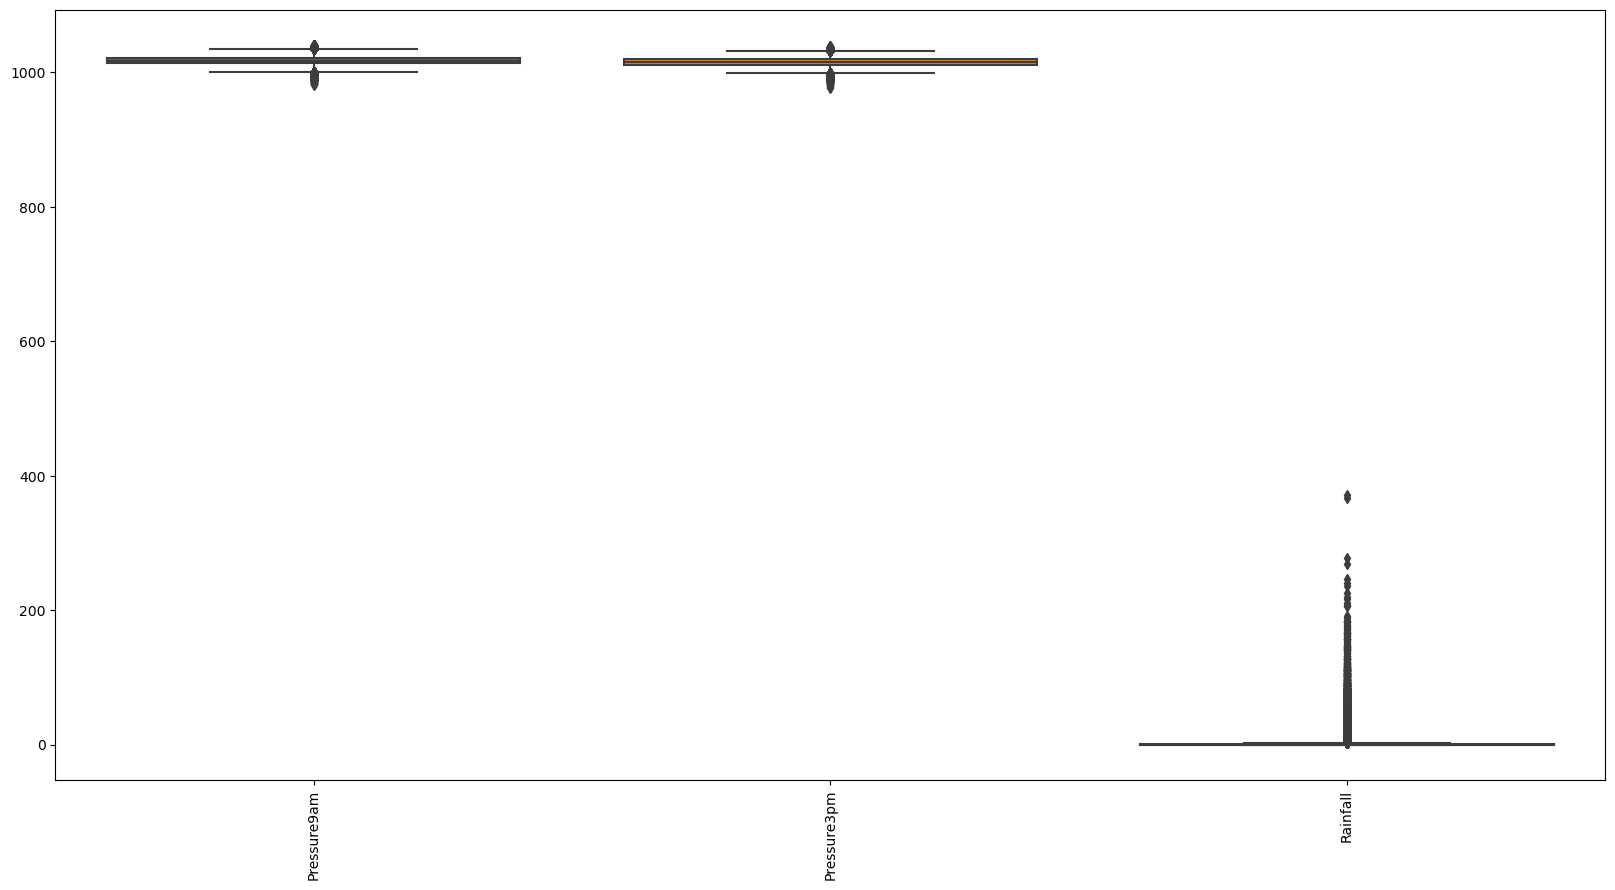

In [37]:

plt.figure(figsize=(20, 10))
sns.boxplot(data=df[a2])
plt.xticks(rotation=90)
plt.show()

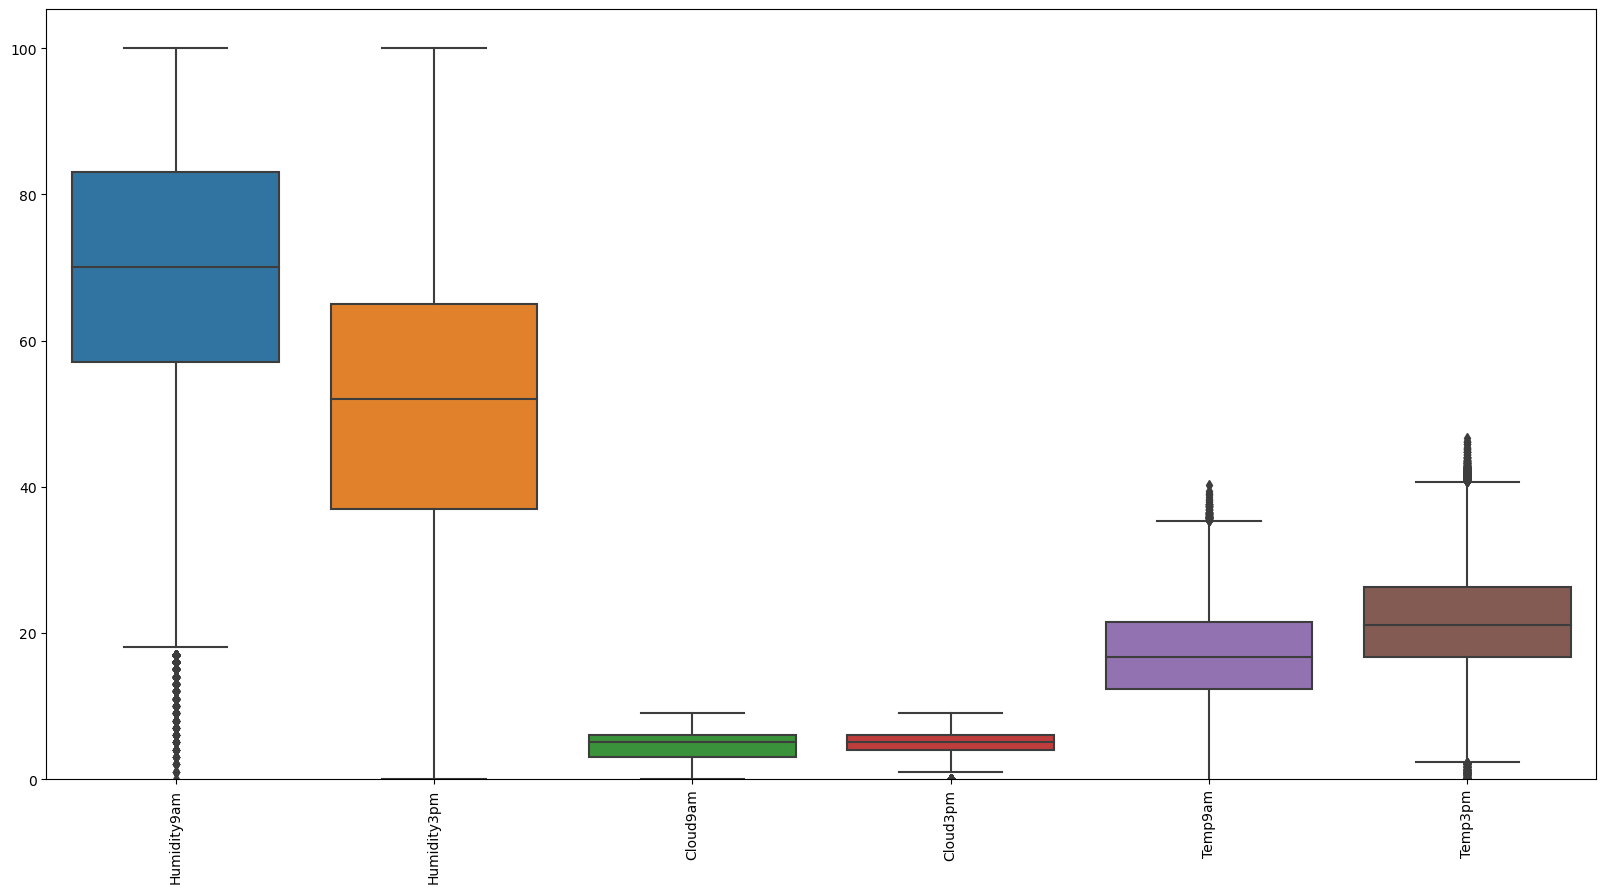

In [38]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[a3])
plt.xticks(rotation=90)
plt.ylim(0, None)  # Set the lower y-axis limit to 0 for better visibility
plt.show()

In [39]:
def plot_hist(column_to_category, data, row=3, col=3):
    for i in range(0, len(column_to_category)):
        plt.subplot(row, col, i+1)
#         plt.scatter(x = column_to_category[i], y = 'SalePrice', data = data)
#         df.boxplot(column_to_category[i])
        sns.histplot(data=data, x=column_to_category[i], kde=True)
        plt.title(f"{column_to_category[i]}" ,fontsize=20)
    plt.show()

In [40]:
sk1 = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine','WindGustSpeed',
      'WindSpeed9am', 'WindSpeed3pm', 'Rainfall']
sk2 = ['Pressure9am', 'Pressure3pm', 'Humidity9am','Humidity3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm']

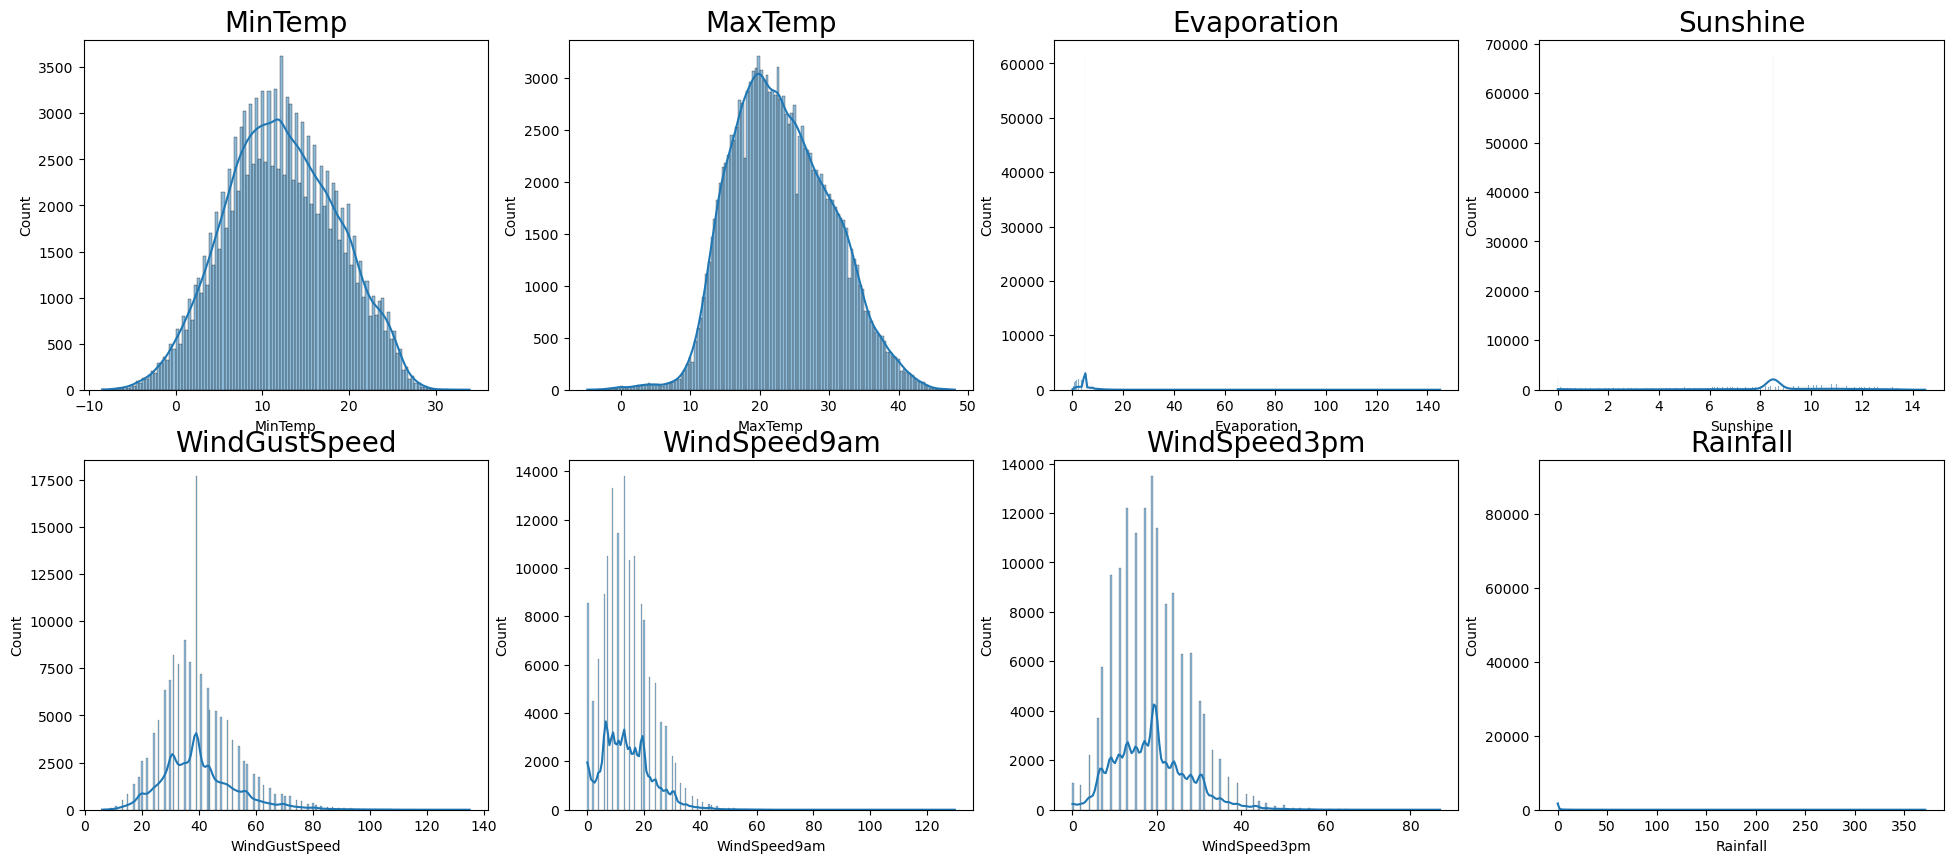

In [41]:
plt.figure(figsize=(24,10))
plot_hist(sk1, df, row=2, col=4)

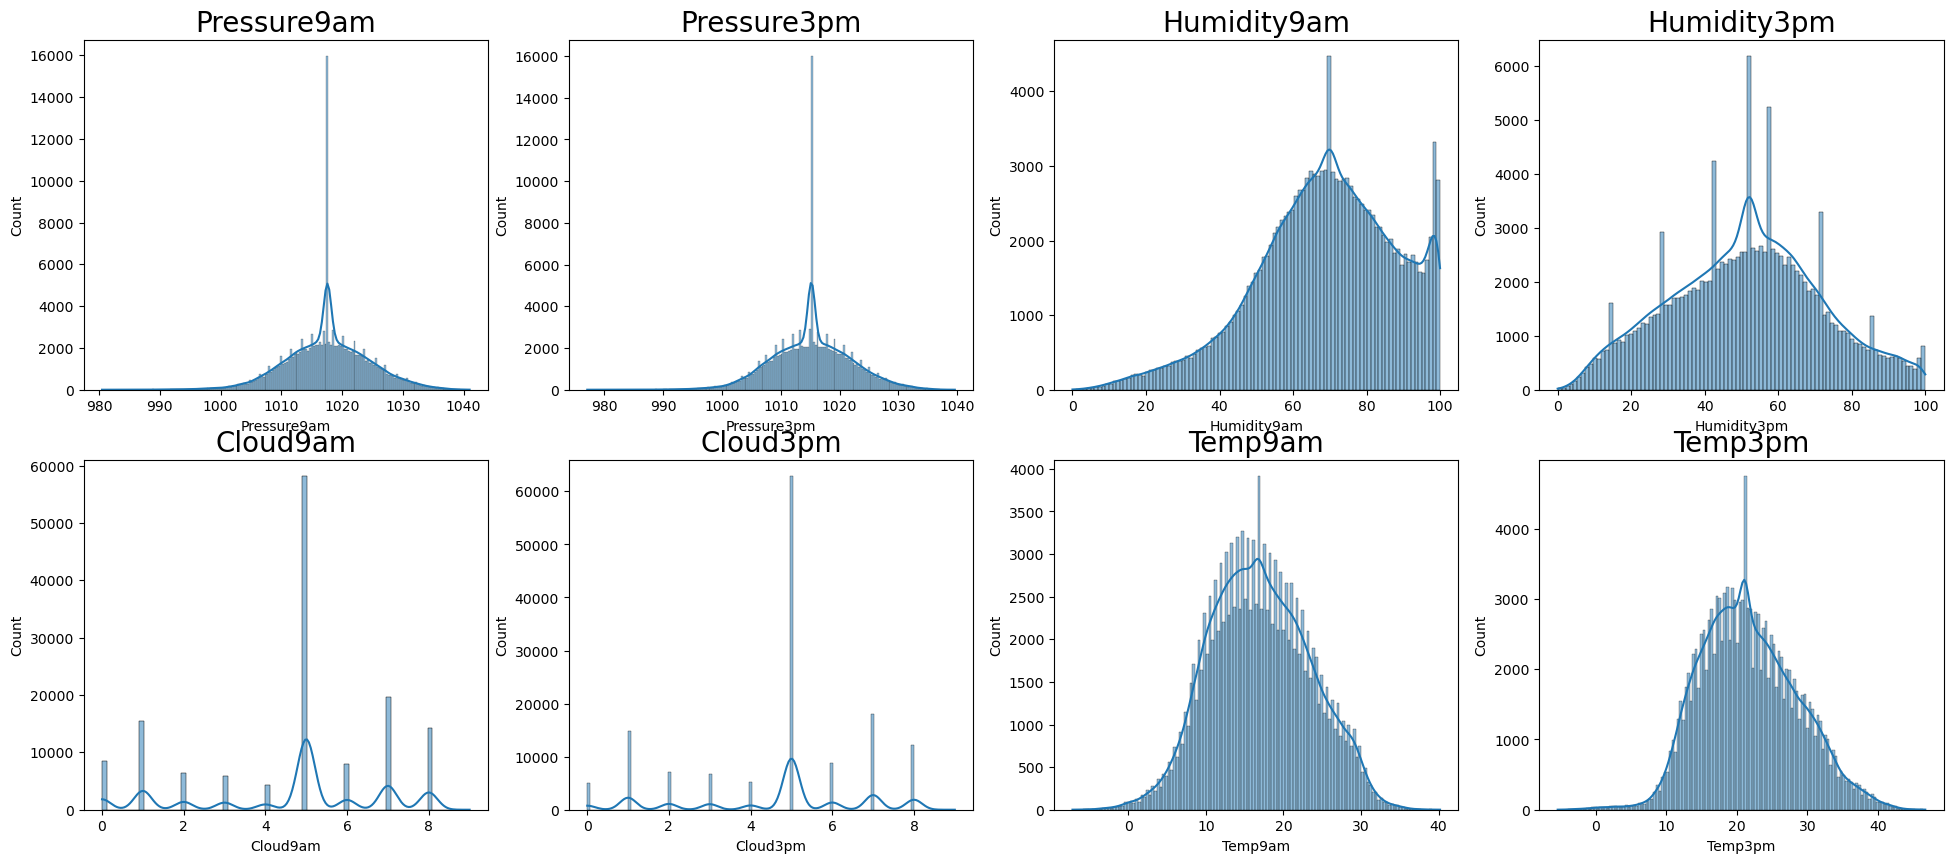

In [42]:
plt.figure(figsize=(24,10))
plot_hist(sk2, df, row=2, col=4)

In [43]:
df_clean = df.copy()
df_clean.shape

(140787, 114)

# outlier removing 


In [44]:
def remove_out(df_clean, num_cols, lbv=0.25, hbv=0.75):
    Q1 = df_clean[num_cols].quantile(lbv)
    Q3 = df_clean[num_cols].quantile(hbv)
    IQR = Q3-Q1
    lb = Q1-1.5*IQR
    hb = Q3+1.5*IQR
    for i in num_cols:
        df_clean = df_clean[(df_clean[i]>=lb[i]) & (df_clean[i]<=hb[i])]
    return df_clean

In [45]:
cols = ['MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day', 'Evaporation', 'Sunshine']

In [46]:
df_clean = remove_out(df_clean, cols, lbv=0.10, hbv=0.90)
df_clean.shape

(133901, 114)

In [47]:
d = df_clean['RainTomorrow'].value_counts()
labels = list(d.index)
d

0    106503
1     27398
Name: RainTomorrow, dtype: int64

0 means NO and 1 means YES

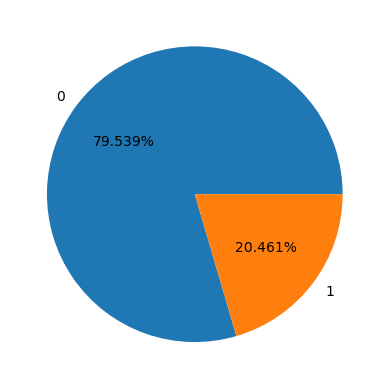

In [48]:
plt.pie(d, labels=labels, autopct='%1.3f%%')
plt.show()

# model spliting 

In [49]:
X = df_clean.drop(['RainTomorrow'], axis=1)

y = df_clean['RainTomorrow']

In [50]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.8,8.5,31.0,15.0,13.0,59.0,27.0,...,0,0,0,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,4.8,8.5,31.0,13.0,11.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,4.8,8.5,22.0,13.0,9.0,56.0,21.0,...,0,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,4.8,8.5,37.0,9.0,9.0,53.0,24.0,...,0,0,0,0,0,0,0,0,1,0


# The SMOTE algorithm helps address class imbalance by creating synthetic samples for the minority class, thereby increasing its representation in the dataset. This can be beneficial when training machine learning models, as it allows the model to learn from a more balanced dataset and potentially improve its performance in predicting the minority class.

In [51]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X, y = sm.fit_resample(X, y)

In [52]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.400000,22.900000,0.600000,4.800000,8.500000,44.000000,20.000000,24.000000,71.000000,22.000000,...,0,0,0,0,0,0,0,0,1,0
1,7.400000,25.100000,0.000000,4.800000,8.500000,44.000000,4.000000,22.000000,44.000000,25.000000,...,0,0,0,0,0,0,0,0,0,1
2,12.900000,25.700000,0.000000,4.800000,8.500000,46.000000,19.000000,26.000000,38.000000,30.000000,...,0,0,0,0,0,0,0,0,0,1
3,9.200000,28.000000,0.000000,4.800000,8.500000,24.000000,11.000000,9.000000,45.000000,16.000000,...,0,0,0,0,0,0,0,0,0,0
4,17.500000,32.300000,1.000000,4.800000,8.500000,41.000000,7.000000,20.000000,82.000000,33.000000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213001,23.920522,29.870305,6.079478,4.360696,1.692132,41.200870,15.200870,25.598259,78.703046,85.497824,...,0,0,0,0,0,0,0,0,0,0
213002,7.436984,17.910886,0.056525,5.373901,4.195740,32.152130,18.586883,15.869506,59.826234,57.717377,...,0,0,0,0,0,0,0,0,0,0
213003,8.748913,19.621709,0.191606,4.608394,9.745441,56.874094,11.251811,26.209843,67.916063,33.622283,...,0,0,0,0,0,0,0,0,0,0
213004,8.200377,14.860264,0.879849,4.800000,8.500000,29.602641,13.000000,11.798491,94.800377,92.000000,...,0,0,0,0,0,0,0,0,1,0


In [53]:
y

0         0
1         0
2         0
3         0
4         0
         ..
213001    1
213002    1
213003    1
213004    1
213005    1
Name: RainTomorrow, Length: 213006, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, train_size=0.8, random_state=123
)

In [55]:
X_train.shape, X_test.shape

((170404, 113), (42602, 113))

In [56]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
133181,10.900000,26.200000,0.000000,4.800000,8.500000,35.000000,9.000000,20.000000,59.000000,35.000000,...,0,0,0,0,0,0,0,1,0,0
190759,17.555340,27.188810,0.000000,8.710681,7.833469,39.000000,13.000000,16.778231,76.778231,62.889116,...,0,0,0,0,0,0,0,0,0,0
130013,21.400000,30.500000,0.000000,6.800000,10.100000,37.000000,19.000000,24.000000,74.000000,48.000000,...,0,0,0,0,0,0,0,0,0,0
204475,5.296567,15.602790,0.000000,4.800000,8.500000,46.289700,6.855150,16.903433,73.951717,86.951717,...,1,0,0,0,0,0,0,0,0,0
203112,24.409264,32.245845,0.000000,8.799523,4.544176,28.726839,9.726839,14.453678,71.182902,59.090259,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148684,25.149110,29.398817,14.364495,4.600000,0.140239,32.976330,14.952660,10.976330,94.011835,88.011835,...,0,0,0,0,0,0,0,0,0,0
93064,5.800000,20.200000,0.000000,3.600000,6.000000,50.000000,24.000000,31.000000,51.000000,45.000000,...,0,0,1,0,0,0,0,0,0,0
115766,15.600000,40.500000,0.000000,4.800000,8.500000,52.000000,24.000000,22.000000,32.000000,14.000000,...,0,0,0,0,0,0,0,0,0,0
153049,11.314965,19.129020,0.000000,4.800000,7.621083,32.537412,7.308392,11.000000,69.691608,71.308392,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y_train

133181    0
190759    1
130013    0
204475    1
203112    1
         ..
148684    1
93064     0
115766    0
153049    1
85214     1
Name: RainTomorrow, Length: 170404, dtype: int64

In [58]:
cols = list(num_df.columns)

In [59]:
cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [60]:
pt = PowerTransformer()from xgboost import XGBClassifier


SyntaxError: invalid syntax (3741857954.py, line 1)

In [ ]:
X_train[cols] = pt.fit_transform(X_train[cols])

In [ ]:
X_test[cols] = pt.transform(X_test[cols])


# The code snippet you provided demonstrates the usage of the XGBClassifier from the XGBoost library to train a classification model using the XGBoost algorithm.

In [ ]:
from xgboost import XGBClassifier


In [ ]:
xgb_cl = XGBClassifier(
    learning_rate=0.1,
    n_estimators=120,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.9
)
xgb_cl.fit(X_train, y_train)

-learning_rate represents the learning rate of the XGBoost algorithm, controlling the step size during gradient boosting.
-n_estimators specifies the number of boosting rounds or decision trees to build.
-max_depth defines the maximum depth of each decision tree in the ensemble.
-min_child_weight is the minimum sum of instance weight (hessian) needed in a child.
-gamma specifies the minimum loss reduction required to make a further partition on a leaf node.
-subsample represents the fraction of samples used for training each tree.

# The accuracy_score function is a utility function provided by scikit-learn that measures the accuracy of a classification model's predictions. It compares the predicted labels with the true labels and calculates the accuracy as the ratio of the number of correctly classified samples to the total number of samples.

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_test = xgb_cl.predict(X_test)

accuracy_score(y_test, y_pred_test)


# we are using logistic regresssion model instead of xgboot library model

In [ ]:


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression
lr_cl = LogisticRegression()
lr_cl.fit(X_train, y_train)
y_pred_lr = lr_cl.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
print(cm)


In [ ]:
lr_cl.predict(X_test)

# in the X_test data there is 113 columns instead of X_test im going to add 113 random numbers to the predicting model

In [ ]:
lr_cl.predict([[8222, 4633, 4628, 5395, 2881, 6328, 3626, 2945, 7189, 8322, 8252, 1665, 2533, 2656, 8373, 8370, 1969, 9112, 9407, 1101, 8934, 6056, 7187, 2144, 5161, 8752, 2571, 8910, 3953, 5971, 5329, 3694, 8985, 8150, 3848, 4233, 3528, 8733, 8551, 7217, 4282, 4864, 1965, 4823, 9312, 7871, 1352, 6268, 5803, 4513, 4152, 1267, 5871, 1051, 5166, 7462, 3312, 1669, 6138, 1662, 2346, 9165, 3786, 4166, 5805, 6208, 7483, 4724, 7735, 5829, 2119, 2029, 8295, 1752, 7380, 6317, 5474, 1739, 6959, 7602, 1264, 5547, 4301, 7554, 7221, 2965, 5399, 7536, 4647, 9031, 9688, 5369, 5818, 3901, 3000, 7094, 2831, 4937, 4559, 2199, 9405, 1263, 7734, 3613, 3244, 2519, 1346, 7610, 3336, 9808, 6148, 2226, 3087]])

In [ ]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(lr_cl, 'lr_model.pkl')
